## Generate Keystone Figures

In [2]:
#import sys
#!{sys.executable} -m pip install ortools 

# import modules
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# visualize graph in the same page as the script
%matplotlib inline

### Set up Input Data

In [3]:
# Generate a list of lists called 'StudentPref'
# There are eight sublists in total, one for each of the eight students in the proof of concept problem
# every sublist in the big list contains the set of courses that each of the eight students wish to take
StudentPref = [[1,2,3,5], [2,3,5,6], [4,10,11,12], [1,2,9,12], [6,7,8,9], [4,8,10,12], [1,7,10,11], [2,3,6,7]]
# StudentPref

In [4]:
# Generate "conflicts" which is a list of pairs of nodes.
# Every pair of nodes is in conflict with each other. Mathematically, and specifically in graph theory,
# a conflict between two nodes amounts to an edge drawn between two given nodes. 
# So, the networkx package will draw an edge between every pair of nodes contained in the 'conflicts' list.
conflicts = []
for row in StudentPref:
    conflicts.extend(list(combinations(row, 2)))

### Generate Simple Undirected Graph

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


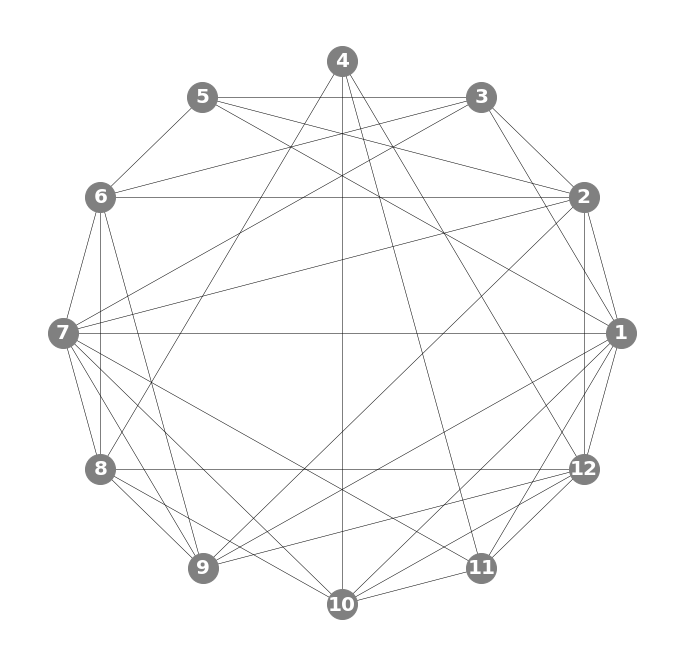

In [5]:
# GENERATE UNDIRECTED GRAPH WITH 12 NODES
# Each node stands for a course
# If two nodes are connected by an edge, this signifies that a student wishes to take both courses
G = nx.Graph() # initialize graph
plt.figure(figsize=(12,12)) # set figure size
plt.ylim(ymin=-1.2, ymax=1.2)
plt.xlim(xmin=-1.2, xmax=1.2)

# adding nodes
G.add_nodes_from(range(1,13))

# adding edges
G.add_edges_from(conflicts)

# set graph shape
pos_nodes = nx.circular_layout(sorted(G)) 
options = {'node_color': 'grey', 'node_size': 900, 'width': .5, 'alpha': 1} # custom graph appearance

# visualize graph
nx.draw(G, pos_nodes,  with_labels=True, font_size=20, **options, font_color='white', font_weight='bold')
plt.show()

### Display 4-colouring of a Simple Undirected Graph

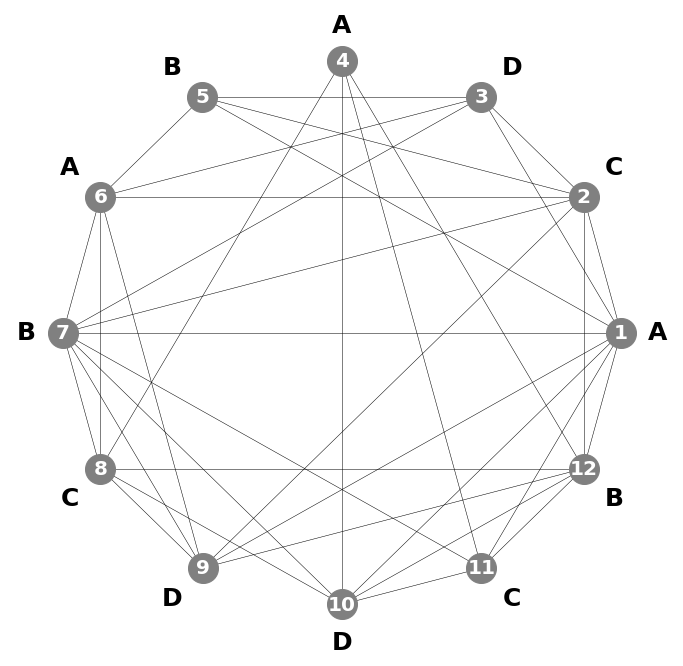

In [6]:
# DISPLAY 4-COLOURING OF UNDIRECTED GRAOH WITH 12 NODES
G = nx.Graph() # initialize graph
plt.figure(figsize=(12,12)) # set figure size
plt.ylim(ymin=-1.2, ymax=1.2)
plt.xlim(xmin=-1.2, xmax=1.2)

# add nodes
G.add_nodes_from([1,4,6], type = 'A')
G.add_nodes_from([5,7,12], type = 'B')
G.add_nodes_from([2,8,11], type = 'C')
G.add_nodes_from([3,9,10], type = 'D')

# add edges
G.add_edges_from(conflicts)
pos_nodes = nx.circular_layout(sorted(G)) # set circular figure shape
options = {'node_color': 'grey', 'node_size': 900, 'width': .5, 'alpha': 1} # custom graph appearance


# generate lists of x and y coordinates for the position of the nodes
lst_x_coords = []
lst_y_coords = []
for node, coords in pos_nodes.items():
    lst_x_coords.append(coords[0])
    lst_y_coords.append(coords[0])
    
# define position of attributes outside nodes   
pos_attrs = {}
for node, coords in pos_nodes.items():    
    if node == 1:
        pos_attrs[node] = (coords[0] + 0.13, coords[1])
    if node == 7:
        pos_attrs[node] = (coords[0] - 0.13, coords[1])
    if node == 10:
        pos_attrs[node] = (coords[0], coords[1] - 0.14)
    if node == 4:
        pos_attrs[node] = (coords[0], coords[1] + 0.13)
    if coords[0]>0 and coords[1]>0 and node != 1:
        pos_attrs[node] = (coords[0] + 0.11, coords[1] + 0.11)
    if coords[0]>0 and coords[1]<0 and node != 10:
        pos_attrs[node] = (coords[0] + 0.11, coords[1] - 0.11)
    if coords[0]<0 and coords[1]<0 and node != 7:
        pos_attrs[node] = (coords[0] - 0.11, coords[1] - 0.11)
    if coords[0]<0 and coords[1]>0 and node != 4:
        pos_attrs[node] = (coords[0] - 0.11, coords[1] + 0.11)
    
# define labels for node attributes          
node_attrs = nx.get_node_attributes(G, 'type')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr
    
# draw graph and node attributes    
nx.draw(G, pos_nodes,  with_labels=True, font_size=20, **options, font_color='white', font_weight='bold')
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, **options, font_size=25, font_weight='bold')
plt.show()

### Display 4-clique of a Simple Undirected Graph

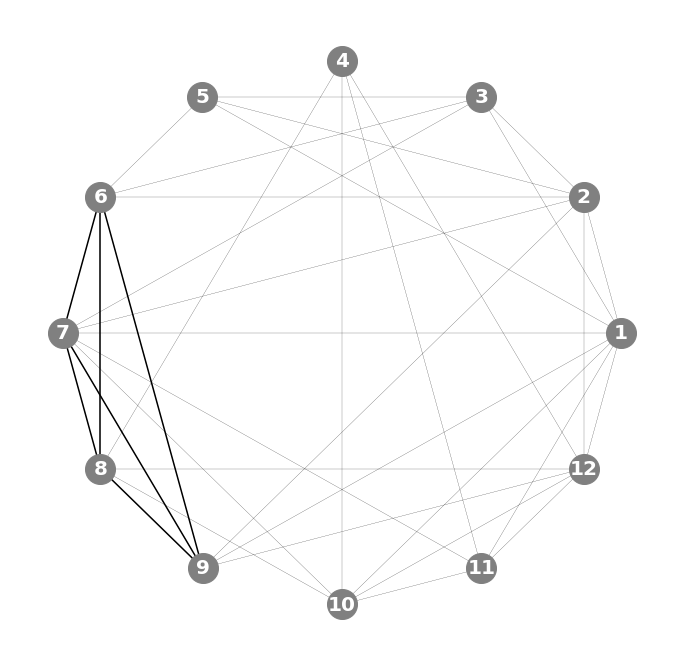

In [7]:
# GENERATE UNDIRECTED GRAPH WITH 4 CLIQUE
G = nx.Graph() # initialize graph
plt.figure(figsize=(12,12)) # set figure size
plt.ylim(ymin=-1.2, ymax=1.2)
plt.xlim(xmin=-1.2, xmax=1.2)

# add nodes
G.add_nodes_from(range(1,13))

# add edges
G.add_edges_from(conflicts)

# set graph shape
pos_nodes = nx.circular_layout(sorted(G)) 
options = {'node_color': 'grey', 'node_size': 900, 'width': .2, 'alpha': 1} # custom graph appearance

# visualize graph
nx.draw(G, pos_nodes,  with_labels=True, font_size=20, **options, font_color='white', font_weight='bold')
nx.draw_networkx_edges(G, pos_nodes, edgelist=[(6,7), (6,8), (6,9), (7,8), (7,9), (8,9)], edge_color='black', width=1.5)
plt.show(G)

## Generate St. Margaret's School Conflict Graphs

In [8]:
# GNENERATE INPUT DATA FOR CONFLICT GRAPH WITH 38 NODES
# Import data
# Import table w/ 10 preferred classes for every student. 
# There are a total of 33 grade 11 students and 25 grade 12 students
AllData = pd.ExcelFile("SMS_student_data.xlsx") 
StudentsPreferences = pd.read_excel(AllData, 'Data')  
# StudentsPreferences

# convert the table into a list of lists
PrefList = StudentsPreferences[1:].values.tolist()
# PrefList

pref = []
for row in PrefList:
    preferences = row[1:]
    pref.append(preferences[1:])
    
PrefMatrix = np.array(pref)
# PrefMatrix

nodes = np.delete(np.unique(PrefMatrix), [0])
# nodes

# generate list containing pairs of conflicting courses
conflicts = []
for row in PrefMatrix:
    conflicts.extend(list(combinations(row, 2)))
# conflicts

# keep only pairs of conflicting courses that do not include 0
edges = [item for item in conflicts if 0 not in item]
# edges

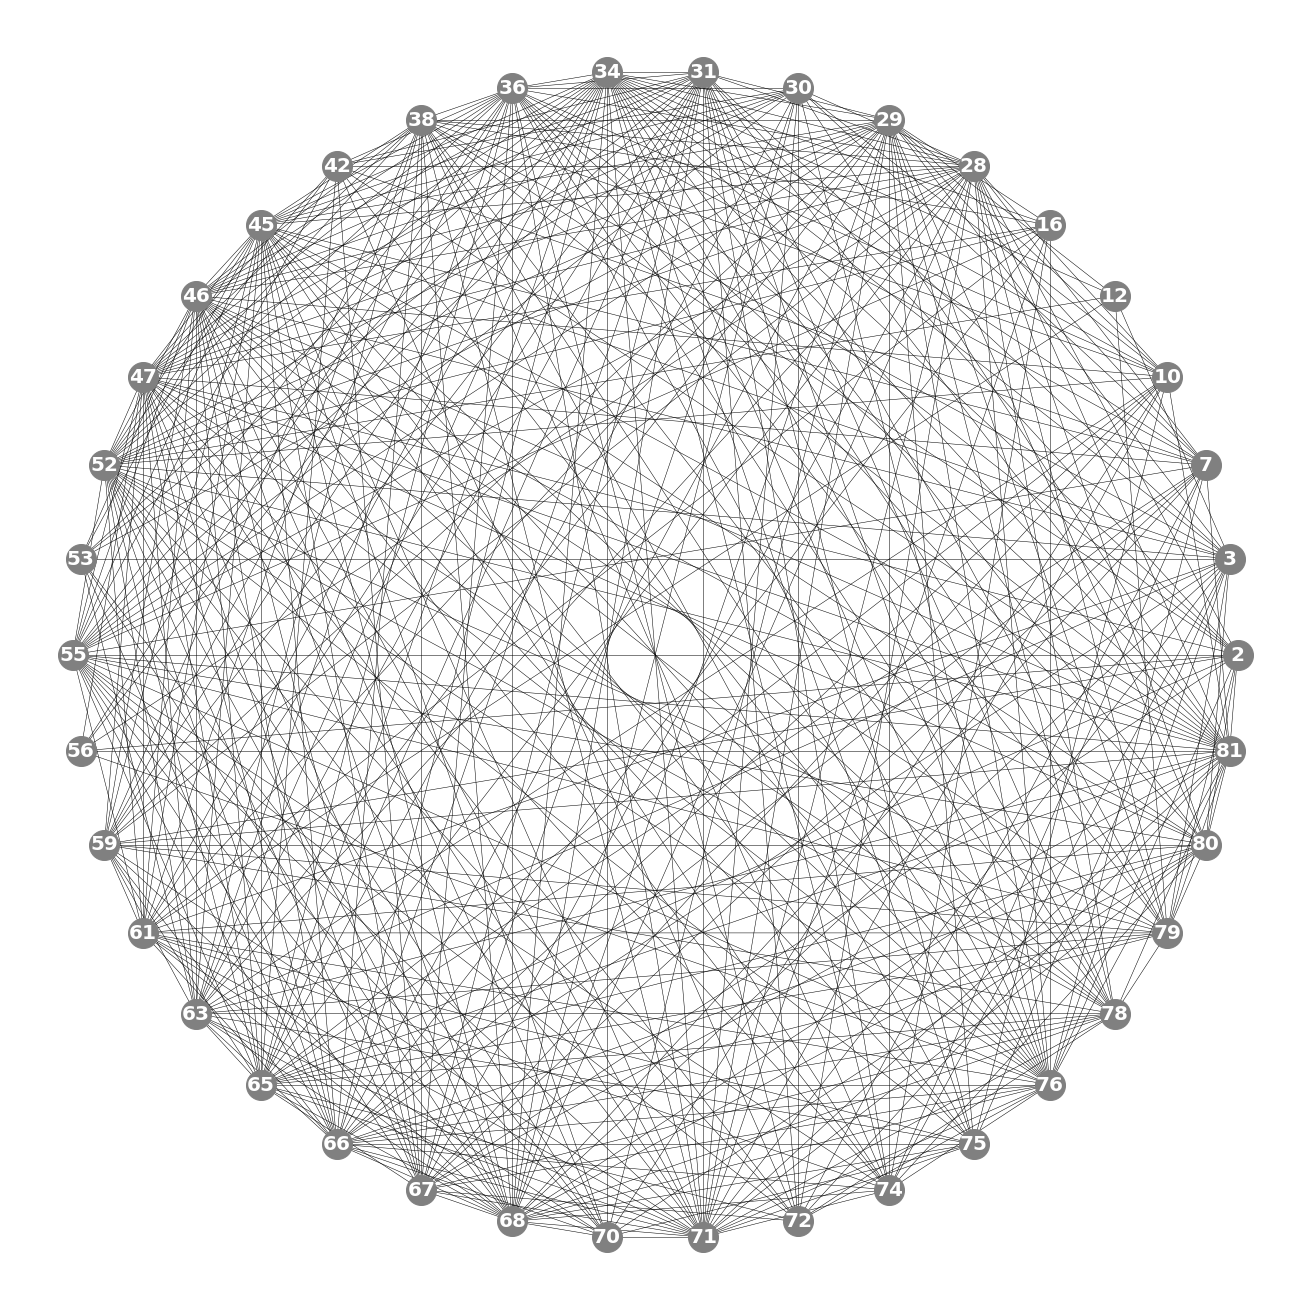

edges: 403 nodes: 38 density: 0.5732574679943101


<Figure size 432x288 with 0 Axes>

In [9]:
# GENERATE INPUT DATA FOR CONFLICT GRAPH WITH 38 NODES & 403 EDGES
ConfGraph = nx.Graph() # initialize graph
plt.figure(figsize=(18,18)) # set figure size

# add nodes
ConfGraph.add_nodes_from(nodes,node_color='r',node_size=500,alpha=0.8,edge_color='r')

# add edges
ConfGraph.add_edges_from(edges)

# set circular layout for the graph nodes
pos = nx.circular_layout(ConfGraph)
options = {'node_color': 'grey', 'node_size': 900,'width': .5}

# visualize graph
nx.draw(ConfGraph, pos, with_labels=True, font_size=20, **options, font_color='white', font_weight='bold')
plt.draw()
plt.show(ConfGraph)
plt.savefig("FullConfGraph.png", dpi=1000)
print("edges:", ConfGraph.number_of_edges(), "nodes:", ConfGraph.number_of_nodes(), "density: %s" % nx.density(ConfGraph))

In [10]:
# GENERATE INPUT DATA FOR CONFLICT GRAPH WITH 38 NODES, BUT FEWER EDGES
# 'edges' is a let's say "weighted" list of all conflicts among courses. Python reads 'edges' as a list of pairs,
# where each pair is a pair of conflicting courses

# Our ultimate goal is to plot a conflict graph with all courses as vertices, were we include only edges with
# 2 or more conflicts. 

# convert a list of tuples into a list of list and order it
lst = []
for item in edges:
    pair = list(item)
    lst.append(pair)
new_edge_list = sorted(lst)
# print('The length of the new_edge_list is:', len(new_edge_list))
# print()
# print('Whereas the list itself is:', new_edge_list)

# keep all elements that appear more than once (or twice, or three times) in a list
pluriconflict_edges = []
for item in new_edge_list:
    if new_edge_list.count(item)>1: # tune this parameter to alter graph density and set the min # of conflicts per edge
        pluriconflict_edges .append(item)
# pluriconflict_edges 

# keep only unique pairs of conflicting courses
unique_pluriconflict_edges = []
for x in pluriconflict_edges:
    if x not in unique_pluriconflict_edges:
        unique_pluriconflict_edges.append(x)
# print(len(unique_pluriconflict_edges), unique_pluriconflict_edges)

# convert a list of lists into a list of tuples
two_or_more_conf_edges = []
for item in unique_pluriconflict_edges:
    pair = tuple(item)
    two_or_more_conf_edges.append(pair)
# two_or_more_conf_edges

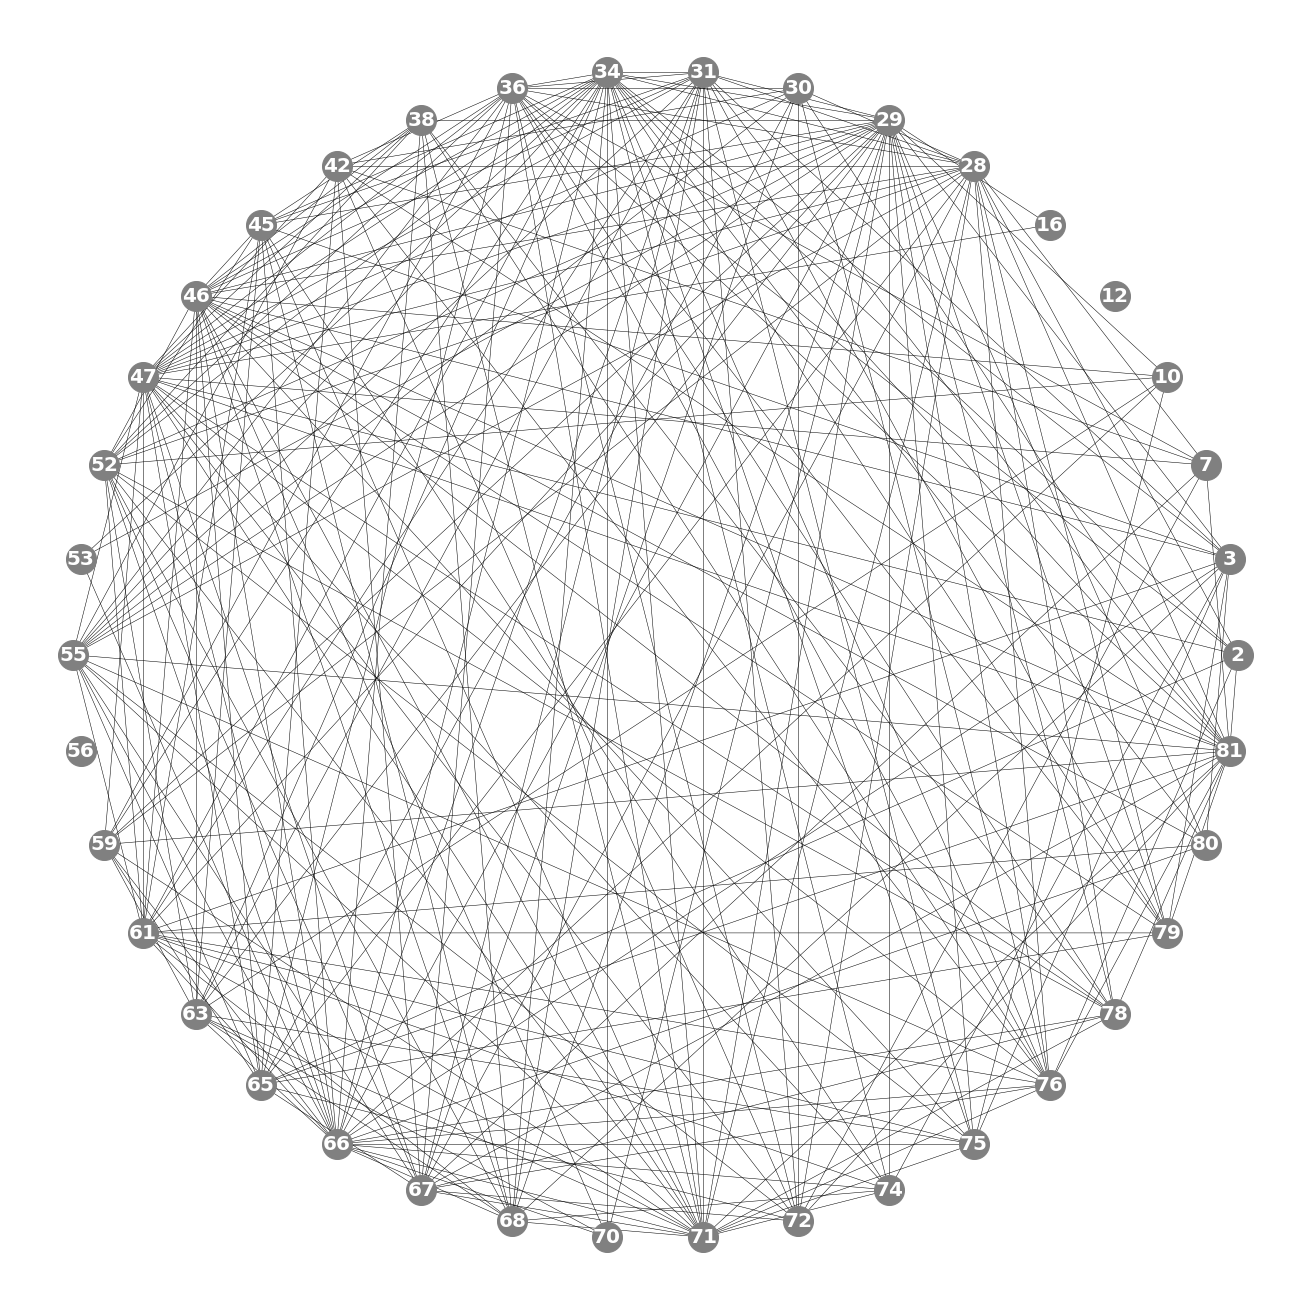

edges: 245 nodes: 38 density: 0.3485064011379801


<Figure size 432x288 with 0 Axes>

In [11]:
# GENERATE INPUT DATA FOR CONFLICT GRAPH WITH 38 NODES, BUT FEWER EDGES
# The following conflict graph only includes edges with two or more conflicts
LowDensityConfGraph = nx.Graph()
plt.figure(figsize=(18,18))

# add nodes
LowDensityConfGraph.add_nodes_from(nodes,node_color='r',node_size=500,alpha=0.8,edge_color='r')

# add edges
LowDensityConfGraph.add_edges_from(two_or_more_conf_edges)

# set circular position for nodes of the graph
pos = nx.circular_layout(LowDensityConfGraph)
options = {'node_color': 'grey', 'node_size': 900,'width': .5}

# visualize graph
nx.draw(LowDensityConfGraph, pos, with_labels=True, font_size=20, **options, font_color='white', font_weight='bold')
plt.draw()
plt.show(LowDensityConfGraph)
plt.savefig("FullLowDensityConfGraph.png", dpi=1000)

print("edges:", LowDensityConfGraph.number_of_edges(), "nodes:", LowDensityConfGraph.number_of_nodes(), "density: %s" % nx.density(LowDensityConfGraph))

In [12]:
# GNENERATE INPUT DATA FOR CONFLICT GRAPH WITH 9 NODES
# choose a subset of nodes
PartialNodes = [2,7,10,30,36,56,59,70]
PartialEdges = []
for item in edges:
    PartialEdges.extend([item for item in edges if item[0] in PartialNodes and item[1] in PartialNodes])    
# PartialEdges

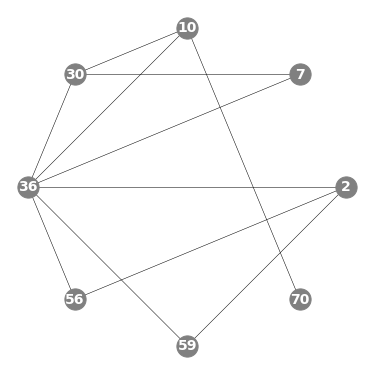

<Figure size 432x288 with 0 Axes>

In [13]:
# GNENERATE CONFLICT GRAPH WITH 9 NODES
ConfGraph = nx.Graph() # initialize graph
plt.figure(figsize=(5,5))

# add nodes
ConfGraph.add_nodes_from(PartialNodes,node_color='r',node_size=500,alpha=0.8,edge_color='r')

# add edges
ConfGraph.add_edges_from(PartialEdges)
# nx.draw_networkx_edges(ConfGraph, pos, width=6, alpha=0.5, edge_color='b', style='dashed')

# set circular node layout
pos = nx.circular_layout(ConfGraph)
options = {'node_color': 'grey', 'node_size': 450,'width': .5, 'edge_color': 'black'}

# visualize graph
nx.draw(ConfGraph, pos, with_labels=True, font_size=14, **options, font_color='white', font_weight='bold')
plt.draw()
plt.show(ConfGraph)
plt.savefig("FullConfGraph.png", dpi=1000)